In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [2]:
data = pd.read_csv("./RNA_seq.csv")
dataT=np.array(data)
data=dataT.T
co=data[0]
data1=np.delete(data,0,axis=0)
data=data1
datadf= pd.DataFrame(data=data[0:,0:],columns=co)
datadf.head()
data=datadf
data= data.replace("NOTLC",value=0)
data= data.replace("LC",value=1)
X=data.drop(['Group'],axis=1)
y=data['Group']

In [59]:
column=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ft=sc.fit_transform(X)
X_ft=pd.DataFrame(data=X_ft,columns=column)

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (878, 60660)
Test shape: (220, 60660)


In [3]:
sel_seq_dt_mask=['ENSG00000003147.19','ENSG00000004455.17','ENSG00000006327.14','ENSG00000018510.17','ENSG00000067064.11','ENSG00000154813.10','ENSG00000204305.14','ENSG00000234425.1','ENSG00000262772.2','ENSG00000272477.1']
sel_seq_rf_mask=['ENSG00000106089.12', 'ENSG00000204305.14', 'ENSG00000223982.3','ENSG00000229693.2']
sel_seq_ada_mask=['ENSG00000000005.6', 'ENSG00000002933.9','ENSG00000019144.19', 'ENSG00000070366.14','ENSG00000091262.16','ENSG00000106089.12','ENSG00000204305.14','ENSG00000233117.4']
sel_seq_gnb_mask=['ENSG00000011052.21','ENSG00000052841.15','ENSG00000062194.16','ENSG00000068001.14','ENSG00000102871.16','ENSG00000124532.15', 'ENSG00000204305.14', 'ENSG00000227066.2']
sel_seq_xgb_mask=['ENSG00000106089.12','ENSG00000138346.15','ENSG00000204305.14']

feature=list(set(sel_seq_dt_mask+sel_seq_rf_mask+sel_seq_ada_mask+sel_seq_gnb_mask+sel_seq_xgb_mask))

In [12]:
fea=['ENSG00000003147.19','ENSG00000004455.17','ENSG00000006327.14','ENSG00000018510.17','ENSG00000067064.11','ENSG00000154813.10','ENSG00000204305.14','ENSG00000234425.1','ENSG00000262772.2','ENSG00000272477.1','ENSG00000204305.14','ENSG00000106089.12','ENSG00000138346.15','ENSG00000124532.15','ENSG00000227066.2','ENSG00000102871.16']
fea=set(fea)

In [16]:
X_new=X[feature]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (878, 27)
Test shape: (220, 27)


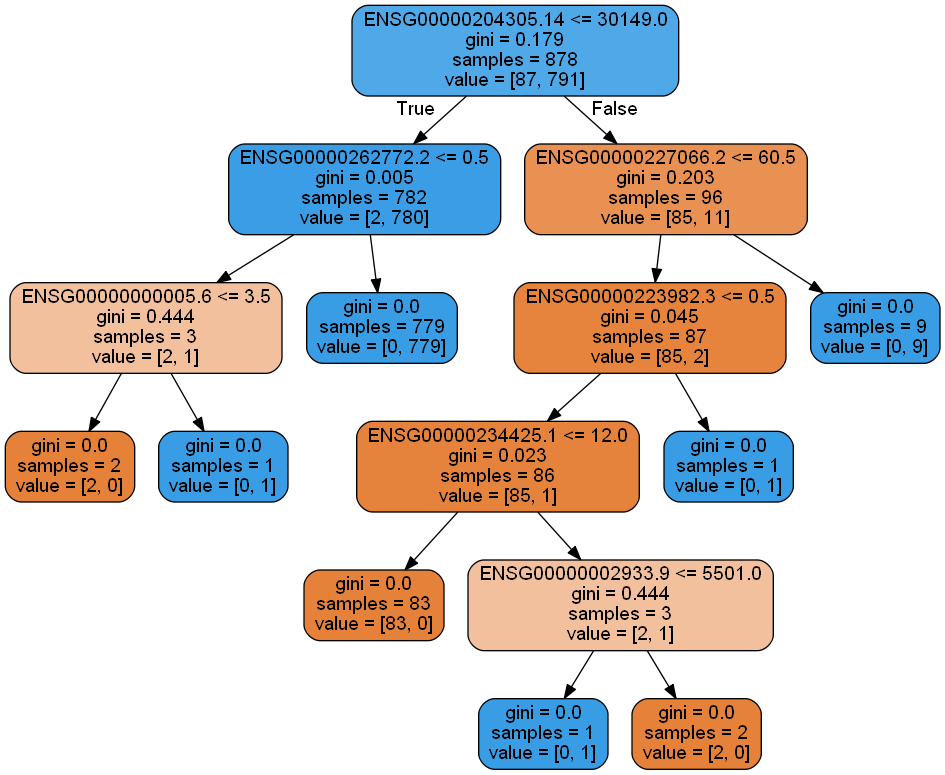

In [18]:
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

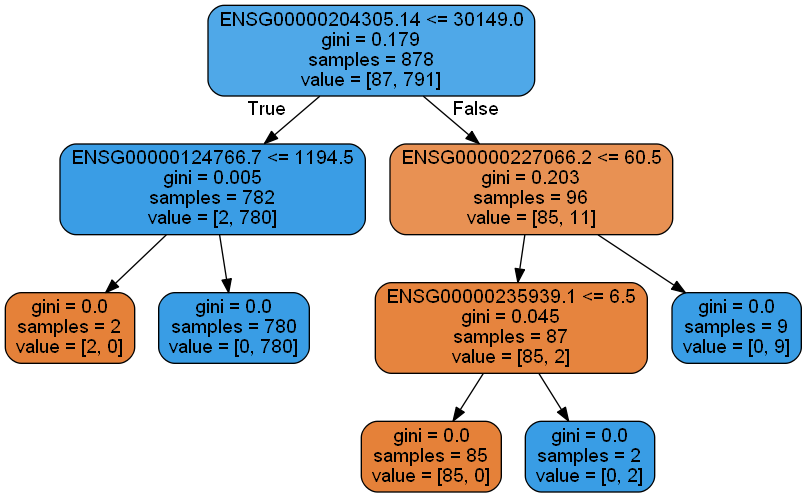

In [83]:
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [63]:
columns=X.columns

In [19]:
import pandas as pd

def remove_constant_columns(df):
    constant_columns = []
    
    # 遍历每一列
    for column in df.columns:
        unique_values = df[column].nunique()
        
        # 如果唯一值数量为1，将其加入到constant_columns列表中
        if unique_values == 1:
            constant_columns.append(column)
    
    # 删除constant_columns中的列
    df = df.drop(columns=constant_columns)
    
    return df

In [20]:
X1=remove_constant_columns(X)

In [21]:
X1= X1.applymap(lambda x: int(x) if isinstance(x, str) else x)

In [22]:
X1

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288658.1,ENSG00000288659.1,ENSG00000288660.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
0,1745,1,1923,1221,1018,2175,1943,1830,1653,2246,...,16,0,0,1,88,0,0,262,12,56
1,3715,0,2468,249,395,150,500,2736,8506,1054,...,21,0,0,0,3,0,0,55,1,2
2,1578,0,1194,693,664,1205,5244,1215,19392,1244,...,28,0,1,0,11,0,2,260,12,16
3,7338,0,1872,596,1047,1656,6848,8263,9263,4245,...,20,0,0,0,36,0,0,338,0,5
4,5495,5,4393,1334,954,737,6599,2430,33698,1606,...,281,0,0,0,15,0,0,234,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2078,5,1004,368,117,763,4473,1755,852,942,...,36,0,0,0,5,0,0,61,5,13
1094,1441,4,1877,882,424,278,2053,1894,5712,1743,...,38,0,0,0,32,0,0,279,2,21
1095,1671,1,1100,649,226,5589,4520,2468,1541,970,...,4,0,0,0,26,0,0,203,7,23
1096,7829,0,2394,1007,1294,1175,2077,3673,2219,1512,...,92,0,0,0,92,1,0,239,1,25


In [24]:
X1_new=X1[fea]

Train shape : (878, 15)
Test shape: (220, 15)


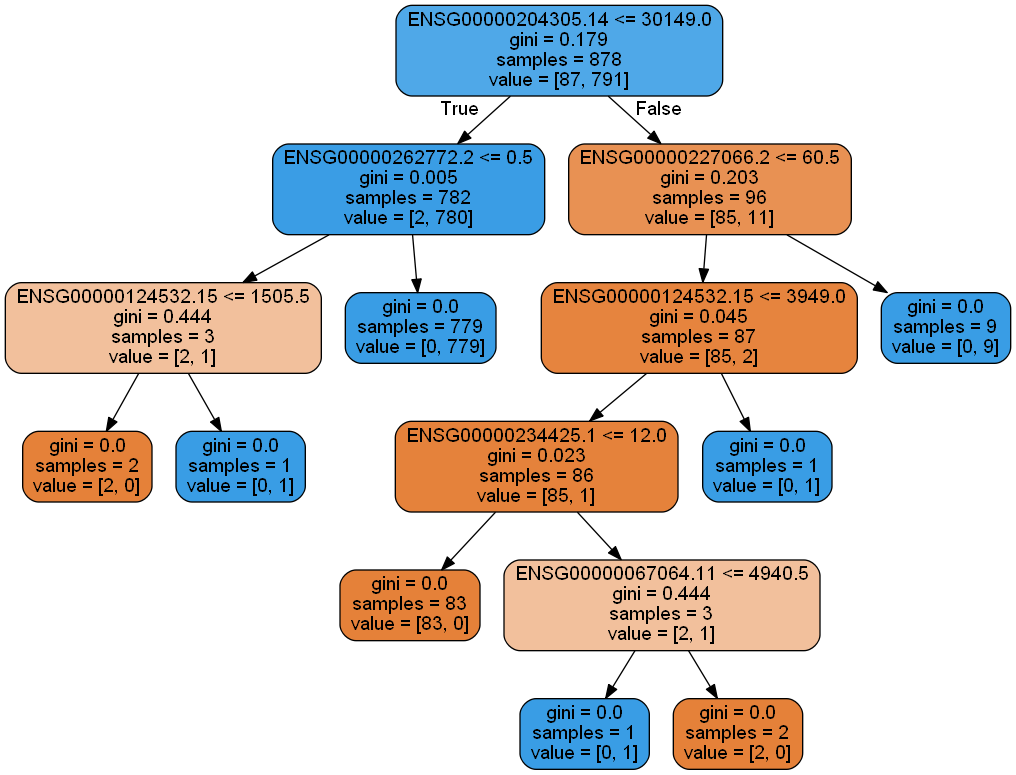

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X1_new,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [88]:
filtered_columns = X1.columns[X1.nunique() / len(X1) < 0.5]
X2= X1.drop(columns=filtered_columns)

In [89]:
X2

,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,...,ENSG00000284024.4,ENSG00000284753.2,ENSG00000284976.1,ENSG00000285410.1,ENSG00000285756.2,ENSG00000285967.1,ENSG00000286042.1,ENSG00000286388.1,ENSG00000287263.1,ENSG00000288066.1
0,1745,1923,1221,1018,2175,1943,1830,1653,2246,409,...,710,628,930,491,765,402,46,452,463,497
1,3715,2468,249,395,150,500,2736,8506,1054,269,...,433,751,82,69,90,328,4,42,82,125
2,1578,1194,693,664,1205,5244,1215,19392,1244,724,...,724,345,627,538,144,357,399,460,319,319
3,7338,1872,596,1047,1656,6848,8263,9263,4245,641,...,2208,1190,1111,253,307,239,1326,183,616,823
4,5495,4393,1334,954,737,6599,2430,33698,1606,1434,...,1439,1485,749,237,585,340,626,564,393,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2078,1004,368,117,763,4473,1755,852,942,353,...,352,112,375,323,164,261,81,146,602,360
1094,1441,1877,882,424,278,2053,1894,5712,1743,639,...,389,997,859,317,512,504,542,125,129,388
1095,1671,1100,649,226,5589,4520,2468,1541,970,858,...,589,84,1767,384,169,335,7,271,851,385
1096,7829,2394,1007,1294,1175,2077,3673,2219,1512,2603,...,1248,715,1009,1522,517,687,1043,814,770,552


Train shape : (878, 12041)
Test shape: (220, 12041)


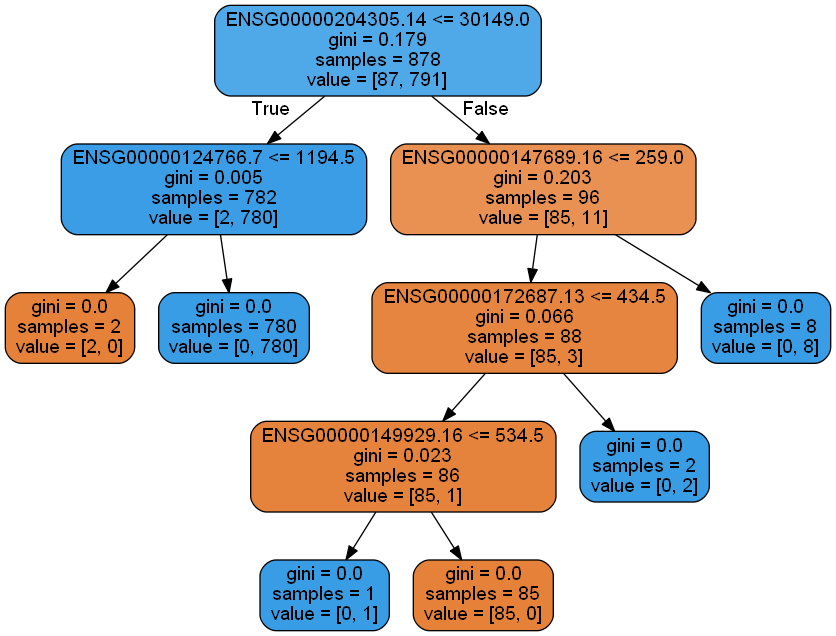

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [91]:
filtered_columns = X2.columns[X2.nunique() / len(X2) < 0.6]
X3= X2.drop(columns=filtered_columns)

Train shape : (878, 10921)
Test shape: (220, 10921)


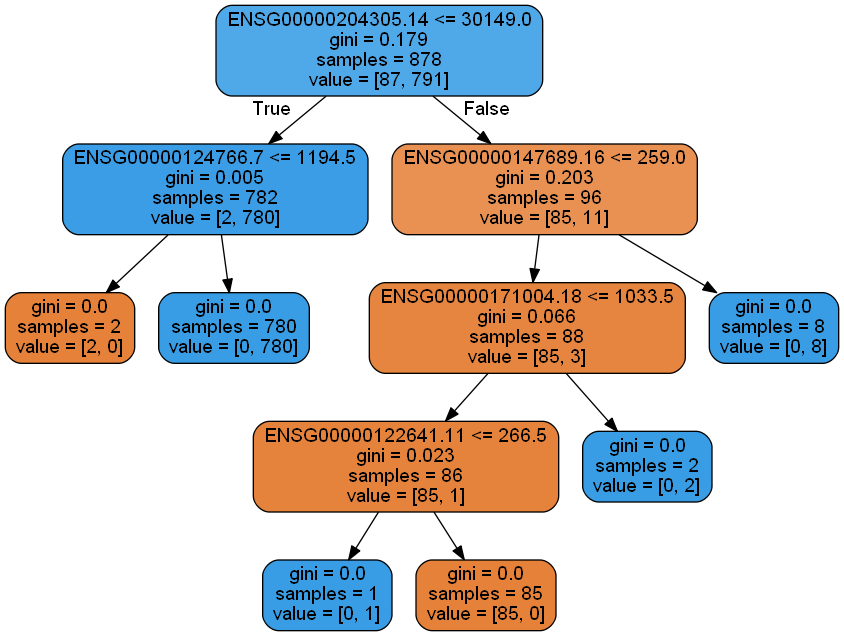

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X3,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [93]:
filtered_columns = X3.columns[X3.nunique() / len(X3) < 0.7]
X4= X3.drop(columns=filtered_columns)

Train shape : (878, 9446)
Test shape: (220, 9446)


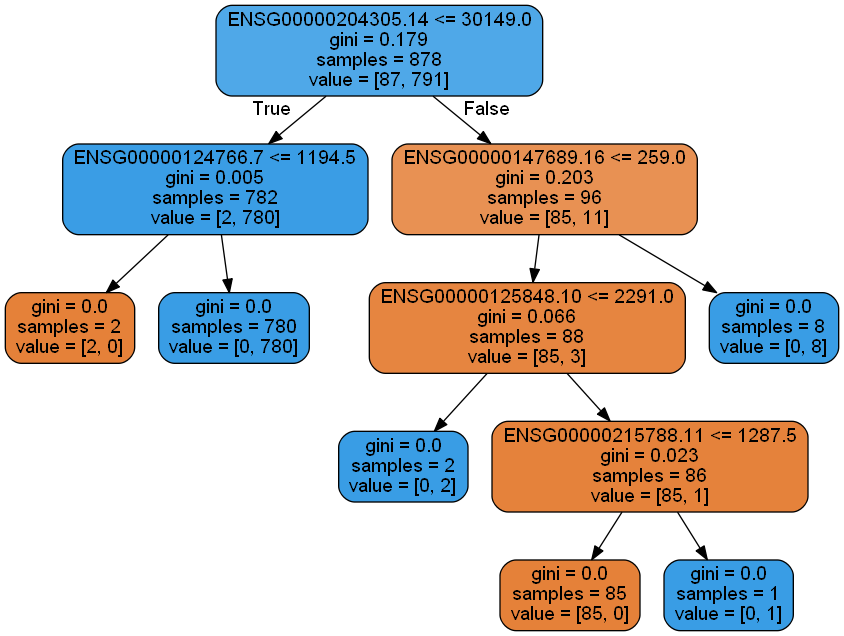

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X4,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Train shape : (878, 7299)
Test shape: (220, 7299)


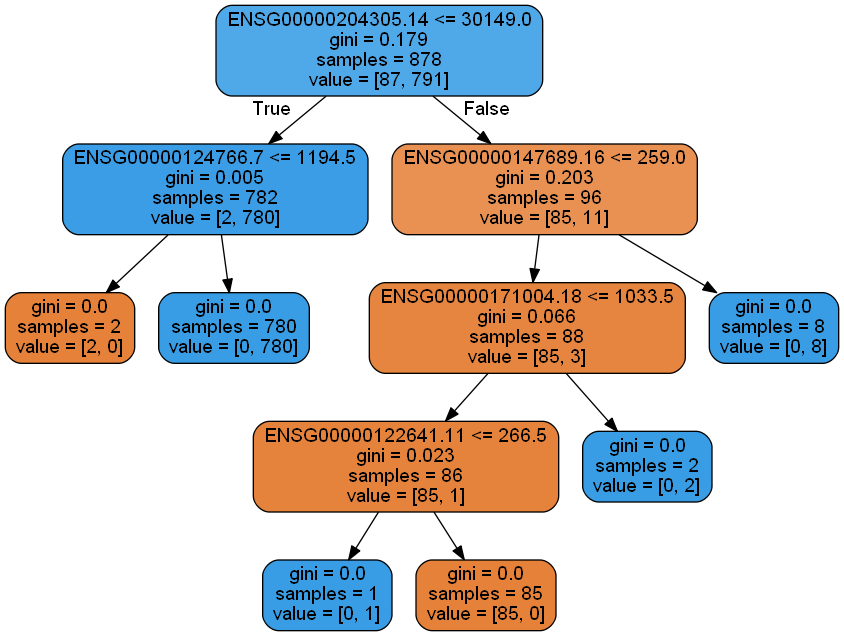

In [96]:
filtered_columns = X4.columns[X4.nunique() / len(X4) < 0.8]
X5= X4.drop(columns=filtered_columns)
X_train,X_test,y_train,y_test = train_test_split(X5,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Train shape : (878, 5700)
Test shape: (220, 5700)


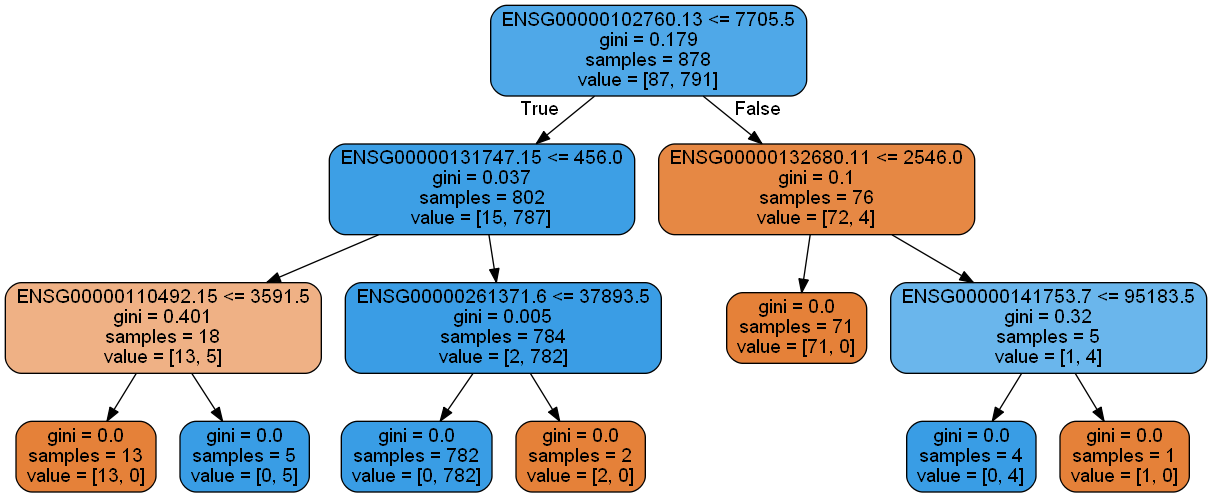

In [97]:
filtered_columns = X5.columns[X5.nunique() / len(X5) < 0.85]
X6= X5.drop(columns=filtered_columns)
X_train,X_test,y_train,y_test = train_test_split(X6,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [25]:
import pandas as pd
import numpy as np

def remove_outliers(df, columns, threshold=0):
    # 遍历每个特征列
    for column in columns:
        # 计算特征列的均值和标准差
        mean = df[column].mean()
        std = df[column].std()
        
        # 确定离群点的阈值范围
        lower_threshold = mean - threshold * std
        upper_threshold = mean + threshold * std
        
        # 找到超出阈值范围的样本索引
        outlier_indices = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)].index
        
        # 去除离群点
        df = df.drop(outlier_indices)
    
    return df

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (878, 1425)
Test shape: (220, 1425)


In [49]:
co=X.columns

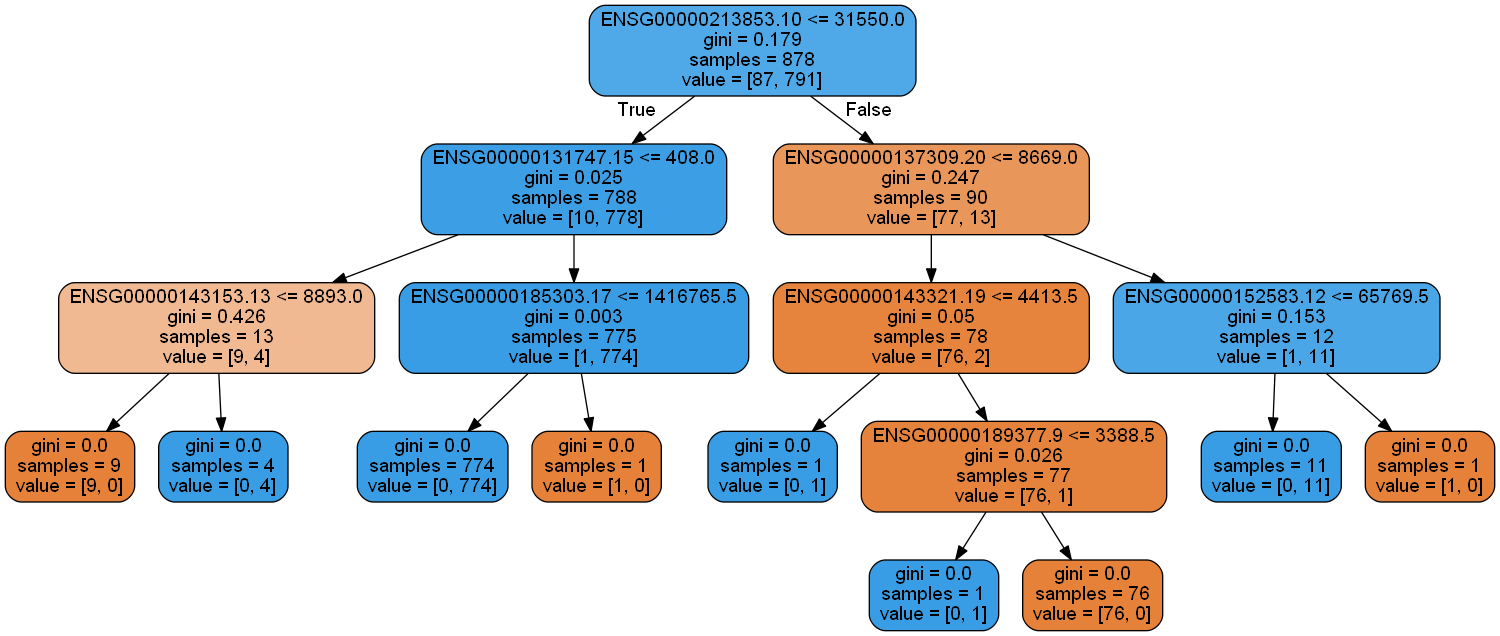

In [48]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
#模型基于决策树，可视化决策树的决策过程
tree=DecisionTreeClassifier().fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

#dot_data_value=dot_data.getvalue().replace('\n','')  # 去除图上的小黑点
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())